# Introduction
Data from the 1994 US Census, which include details on age, type of employer, education, marital status, occupation, race, gender, capital gains and losses, number of hours worked per week, country of origin, and income.

The dataset can be used for many different things, including analyzing income inequality, spotting demographic trends, and figuring out what factors lead to higher income levels. The target variable in the dataset is the income variable, which indicates whether or not a person earns more than $50,000 annually. Using this variable, classification tasks can be performed, such as developing models to forecast income levels based on other dataset features.

Overall, the dataset offers insightful information about the socioeconomic and demographic characteristics of the US population.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('C://Users//pc//Desktop//censusData.csv') #importing data from local pc

In [3]:
df.head() # top 5 rows of the census data frame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Variable "fnlwgt" is sampling weight of the observation, which has no effect on the analysis therefore we can safely drop the variable by: del df["fnlwgt"]
Education-num is just a numerical representation of education level, as the information gained from both variables are same we can safely drop one without affecting the analysis. del df["education-num"]
Marital-status is a better variable than relationship variable therefore we can safely drop relationship variable by: del df["relationship"]

In [4]:
df.tail() # bottom 5 rows of the census data frame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


some variable names has hyphen and needs to be replaced with underscore and " hours-per-week" has space in the name which will need to be removed. and there seems to no null values

In [6]:
df.describe() 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Age variable median is 37 which is less affected by skewness/outliers than mean which is 38.58, we see similar pattern for hours-per-week.

possible problems we may face are with varibles fnlwgt. capital-gain, capital-loss, which we will look at individually

In [7]:
df.describe(include=['object']) # we now will describe the categoricl variables

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


unique categories in some vairbales are too many, we can reduce this by groupping it together. 

In [8]:
df.nunique()

age                   73
workclass              9
fnlwgt             21648
education             16
education-num         16
marital-status         7
occupation            15
relationship           6
race                   5
sex                    2
capital-gain         119
capital-loss          92
 hours-per-week       94
native-country        42
income                 2
dtype: int64

In [9]:
df.value_counts() 
#categories in variables have " ?" which needs to be replaced with NA for uniformaity

age  workclass          fnlwgt  education      education-num  marital-status       occupation          relationship    race    sex      capital-gain  capital-loss   hours-per-week  native-country  income
25    Private           195994   1st-4th       2               Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40                Guatemala       <=50K    3
23    Private           240137   5th-6th       3               Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55                Mexico          <=50K    2
38    Private           207202   HS-grad       9               Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48                United-States   >50K     2
30    Private           144593   HS-grad       9               Never-married        Other-service       Not-in-family   Black   Male    0             0             40   

# Univariate analysis

## Age

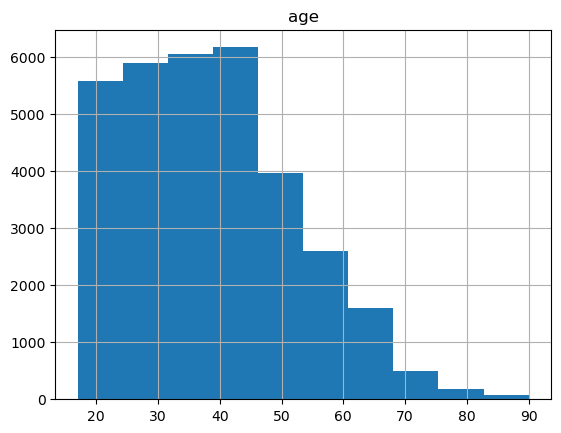

In [10]:
df.hist(column = "age");

In [11]:
df["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

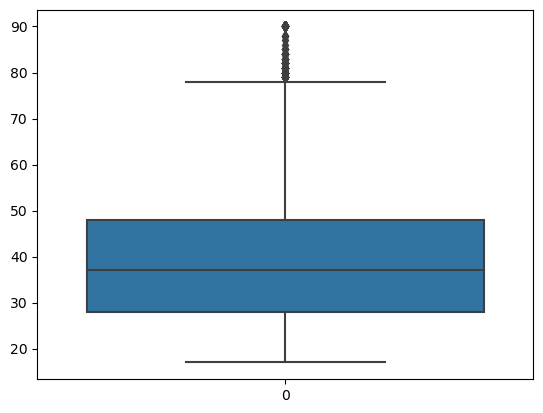

In [12]:
sns.boxplot(df["age"]);

##### Removing outliers from age column
q25 = np.percentile(df['age'],25)
q75 = np.percentile(df['age'],75)
iqr = q75 - q25
print(iqr)
##### first outlining the upper and lower boundry
upper = q75 + 1.5 * iqr
lower = q25 - 1.5 * iqr
print(upper)
print(lower)
##### removal of outliers
df = df[~((df.age < (q25 - 1.5 * iqr))|(df.age > (q75 + 1.5 * iqr)))]
sns.boxplot(df["age"]);

### Work Class

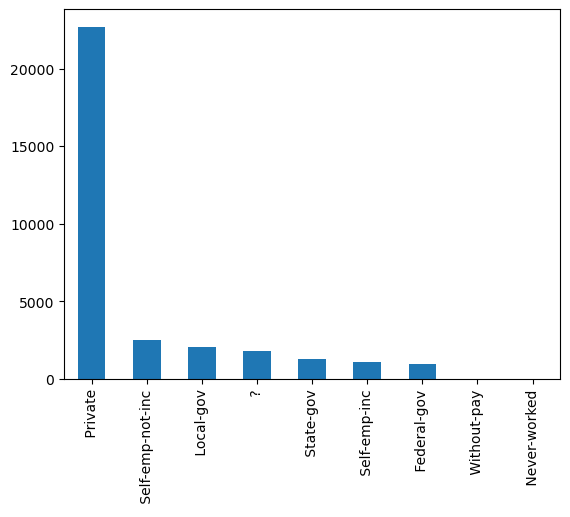

In [13]:
df['workclass'].value_counts().plot(kind='bar');

In [14]:
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


##### There are too many categories in this variable including an unknown category in form of question mark. 
we can group similar categories into one encompasing category such as all government jobs can go under category "government" which will make this category much more simple to handle and work with. e.g:
##### ' State-gov'' Federal-gov' ' Local-gov' = government
##### ' Self-emp-not-inc' ' Self-emp-inc'   = self-employed
##### 'private' =  private
##### ' Without-pay' ' Never-worked' = no-income
##### ' ?'   = NA

### Education

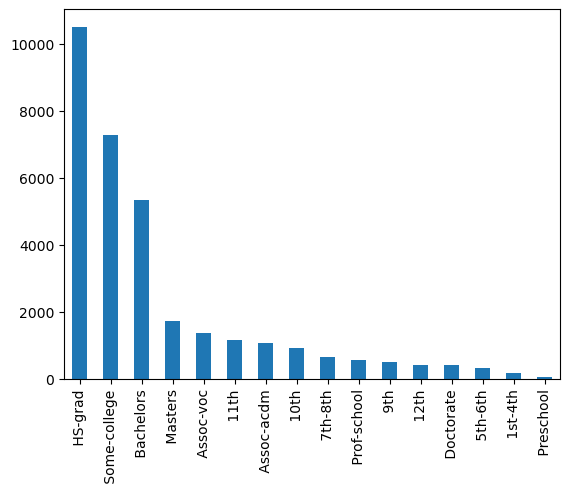

In [15]:
df['education'].value_counts().plot(kind='bar');

In [16]:
print(df['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


#### we have similar problems with this variable as we had with workclass. we can also reduce this to:  
#### uneducated = ' Preschool'' 1st-4th'
#### elementry = ' 5th-6th' 
#### middleschool = ' 7th-8th'
#### highschool = ' 9th'' 10th'' 11th'' 12th'' HS-grad'
#### college = ' Some-college'' Assoc-acdm' ' Assoc-voc'
#### bachelors = ' Bachelors'
#### master = ' Masters'
#### Prof-school= ' Prof-school'
#### Doctorate = ' Doctorate'
reducing 16 categories to just 9

### Education Number

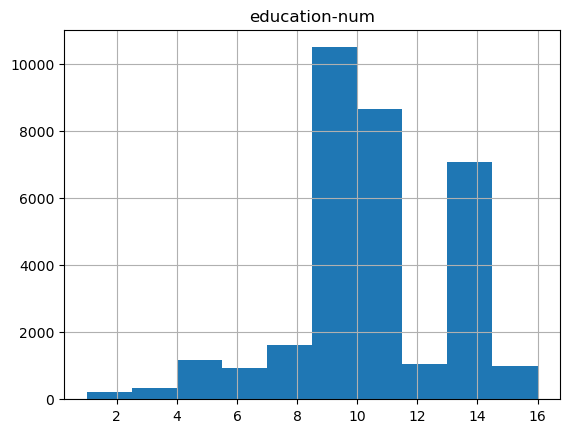

In [17]:
df.hist(column = 'education-num');

In [18]:
print(df['education-num'].unique())

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


## Marital status

In [19]:
print(df['marital-status'].unique())
# there is a posibility of reducing categories in this variable aswell. such as 
#' Married-spouse-absent', ' Separated' = Separated
#' Married-AF-spouse', ' Married-civ-spouse' = Married
# also the names of categories has space before it which needs to be dealth with

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


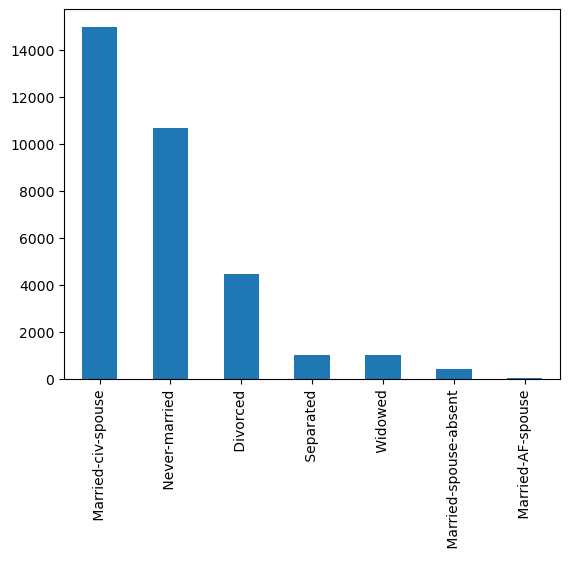

In [20]:
df['marital-status'].value_counts().plot(kind='bar');

## Occupation

In [21]:
print(df['occupation'].unique())
# categories can be better named and reduced and replacing hyphen
# we have category that is named as ' ?' which will be replaced with NA.
#df['occupation'] = df['occupation'].replace(' ?', 'NA')

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


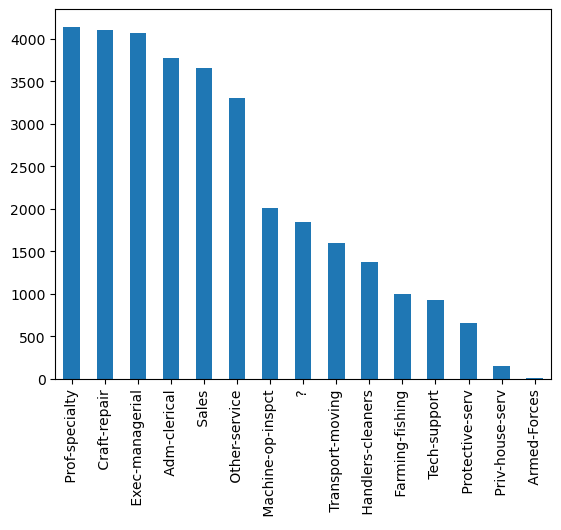

In [22]:
df['occupation'].value_counts().plot(kind='bar');

## Race

In [23]:
print(df['race'].unique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


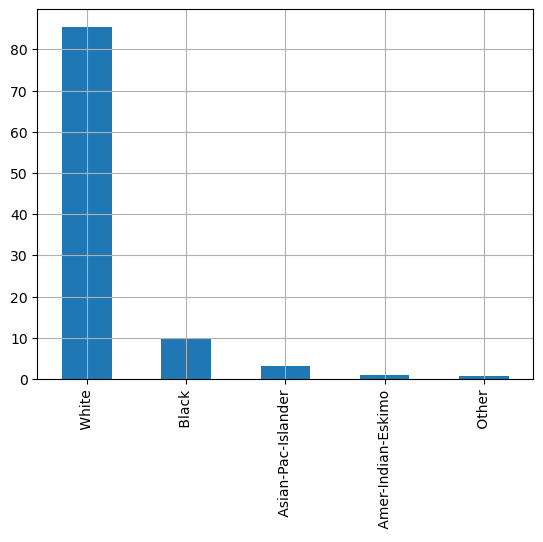

In [24]:
(df['race'].value_counts(normalize=True) * 100).plot(kind='bar', grid=True);
#the dominating category in race is white and almost 85%. Black is 10%.
#we can bundle up the rest ~5% in 'Other' category

## Sex

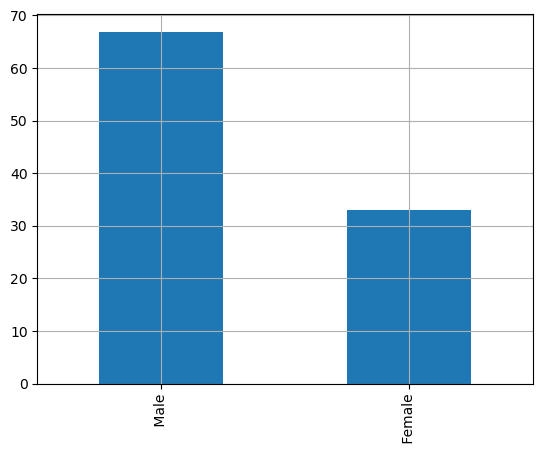

In [25]:
(df['sex'].value_counts(normalize=True) * 100).plot(kind='bar', grid=True);
# more male than female in this category, 2:1 ratio: 

### Capital Gain

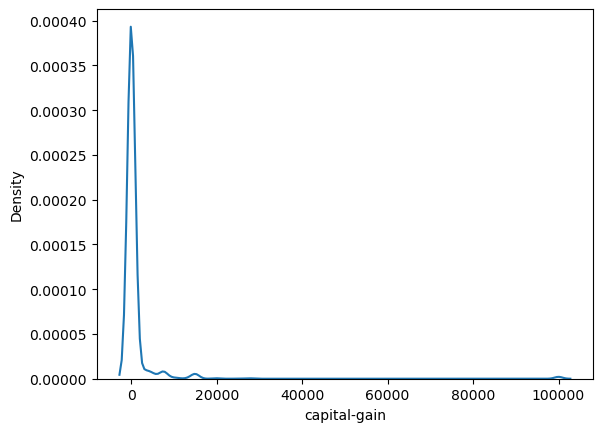

In [26]:
sns.kdeplot(df["capital-gain"])
plt.show()
# right skewed 

In [27]:
df["capital-gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

## we can change this to a categorical variable and deal with it that way rather than dropping the variable

### Create a new column for binary variable indicating if capital gain is present
df['has_capital_gain'] = (df['capital-gain'] > 0).astype('category')

### Remove the orignal 'capital-gain' column
df.drop('capital-gain', axis=1, inplace=True)

### Check the updated dataframe
print(df['has_capital_gain'].unique())

(df['has_capital_gain'].value_counts(normalize=True) * 100).plot(kind='bar', grid=True);

### Capital loss

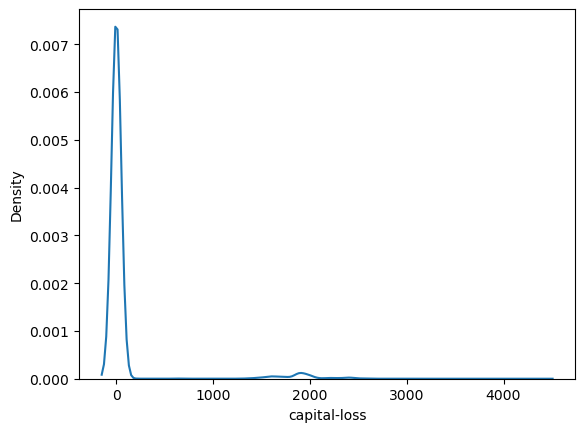

In [28]:
sns.kdeplot(df["capital-loss"])
plt.show()
# right skewed 

In [29]:
df["capital-loss"].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

## we can change this to a categorical variable aswell and deal with it that way rather than dropping the variable¶

### Create a new column for binary variable indicating if capital gain is present
df['has_capital_loss'] = (df['capital-loss'] > 0).astype('category')

### Remove the orignal 'capital-gain' column
df.drop('capital-loss', axis=1, inplace=True)

### Check the updated dataframe
print(df['has_capital_loss'].unique())

(df['has_capital_loss'].value_counts(normalize=True) * 100).plot(kind='bar', grid=True);

### Hours Worked Per Week

In [30]:
df[" hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name:  hours-per-week, dtype: float64

In [31]:
# this variable has space in the variable name, there needs to be correctted by renameing it and removing the space.
df.rename(columns={' hours-per-week': 'hours_per_week'}, inplace=True)

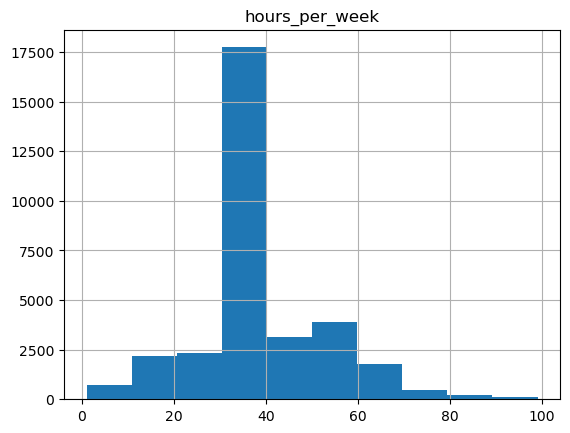

In [32]:
df.hist(column ='hours_per_week');

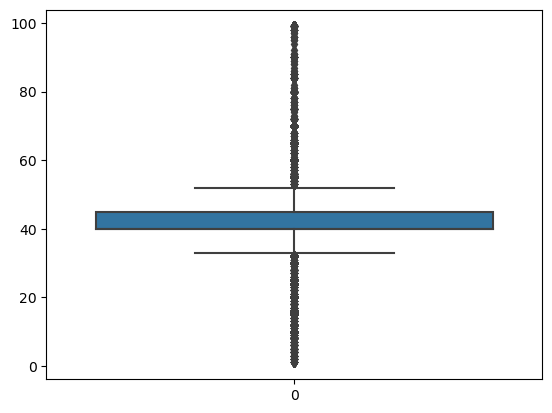

In [33]:
sns.boxplot(df['hours_per_week']); 
# possible outliers as some work hours exceed 90 hours a week

### Removing outliers from age column
q25 = np.percentile(df['hours_per_week'],25)
q75 = np.percentile(df['hours_per_week'],75)
iqr = q75 - q25
print(iqr)
### first outlining the upper and lower boundry
upper = q75 + 1.5 * iqr
lower = q25 - 1.5 * iqr
print(upper)
print(lower)
### removal of outliers
df = df[~((df.hours_per_week < (q25 - 1.5 * iqr))|(df.hours_per_week > (q75 + 1.5 * iqr)))]

### plotting of boxplot again
sns.boxplot(df["hours_per_week"]);

### Native Country

In [34]:
df.rename(columns={'native-country': 'native_country'}, inplace=True)

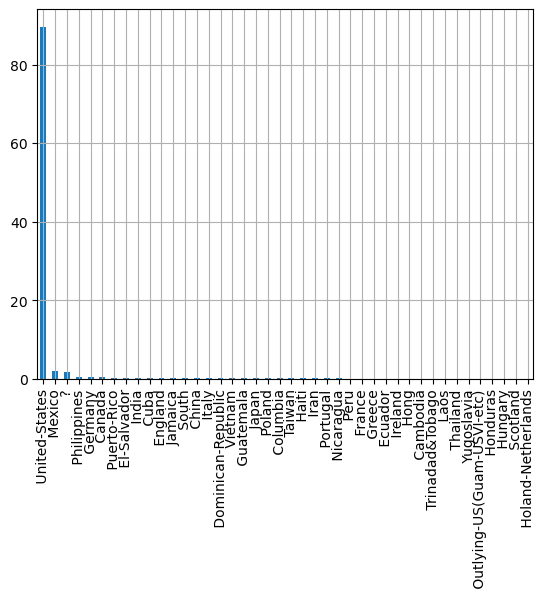

In [35]:
(df['native_country'].value_counts(normalize = True)* 100).plot(kind='bar',grid=True); 
# US is dominant category, we can lump any country less than 1% into "Other" Category and " ?" with NA

In [36]:
df["native_country"].describe()
# 42 unique countries 

count              32561
unique                42
top        United-States
freq               29170
Name: native_country, dtype: object

### Count the frequency of each category in the 'native_country' column
country_counts = df['native_country'].value_counts(normalize=True)

### Identify categories with frequency less than 1%
infrequent_countries = country_counts[country_counts < 0.01].index.tolist()

### Replace the infrequent categories with 'Other'
df['native_country'] = df['native_country'].replace(infrequent_countries, 'Other')

### Replace the ' ?' categories with 'NA'
df['native_country'] = df['native_country'].replace(' ?', 'NA')

### Plotting the variable again with new categories
(df['native_country'].value_counts(normalize = True)* 100).plot(kind='bar',grid=True); 

### Income

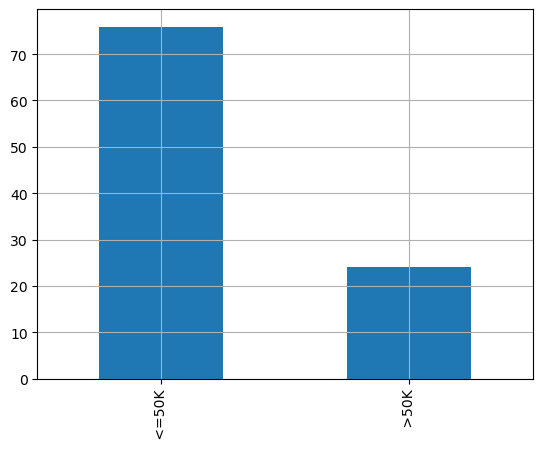

In [37]:
(df['income'].value_counts(normalize=True) * 100).plot(kind='bar',grid=True);

# Bivariate Analysis

## Age

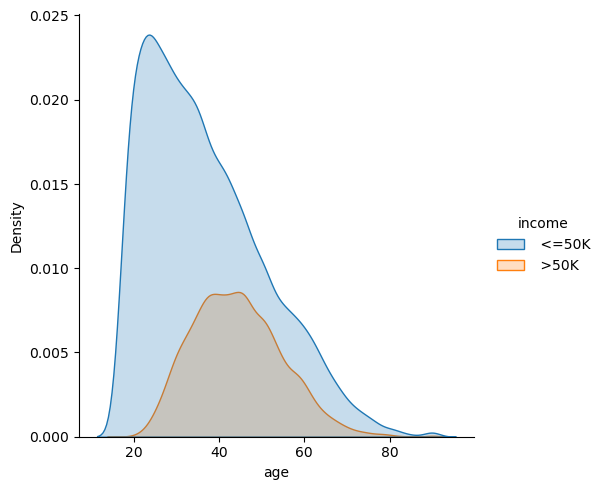

In [38]:
sns.displot(df, x="age", hue="income", kind="kde", fill=True);
#those earning >50K are aged between ~20 to ~80 peaking around 40

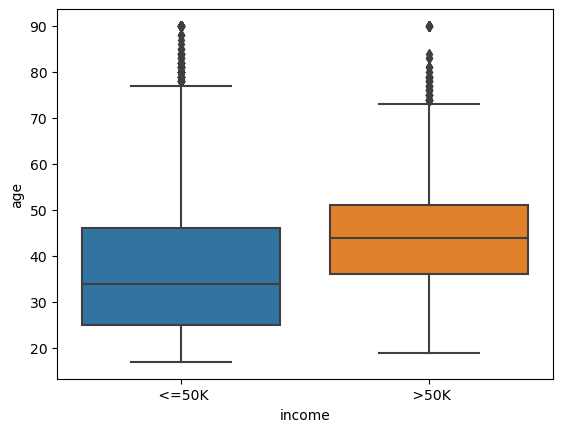

In [39]:
sns.boxplot(x="income", y="age", data=df);

In [40]:
# Group the data by income and compute the mean, median, mode, standard deviation, and IQR of age for each group
age_stats = df.groupby('income')['age'].agg(['mean', 'median', lambda x: x.mode()[0], 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)]).reset_index()

# Rename the lambda columns to 'mode' and 'iqr' for clarity
age_stats = age_stats.rename(columns={'<lambda_0>': 'mode', '<lambda_1>': 'iqr'})

# Print the resulting dataframe
print(age_stats)

   income       mean  median  mode        std   iqr
0   <=50K  36.783738    34.0    23  14.020088  21.0
1    >50K  44.249841    44.0    37  10.519028  15.0


## Workclass

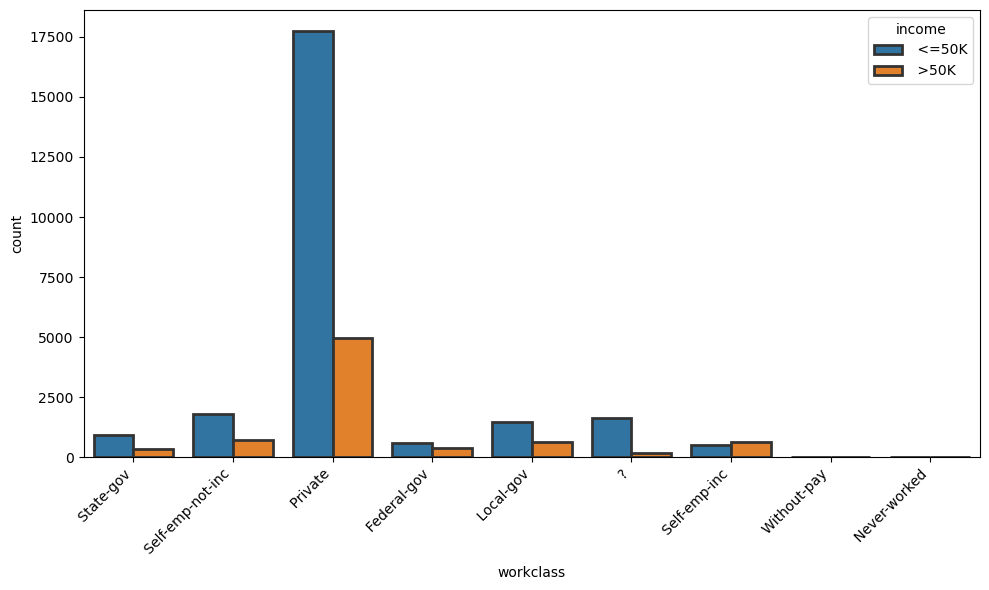

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='workclass', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Education

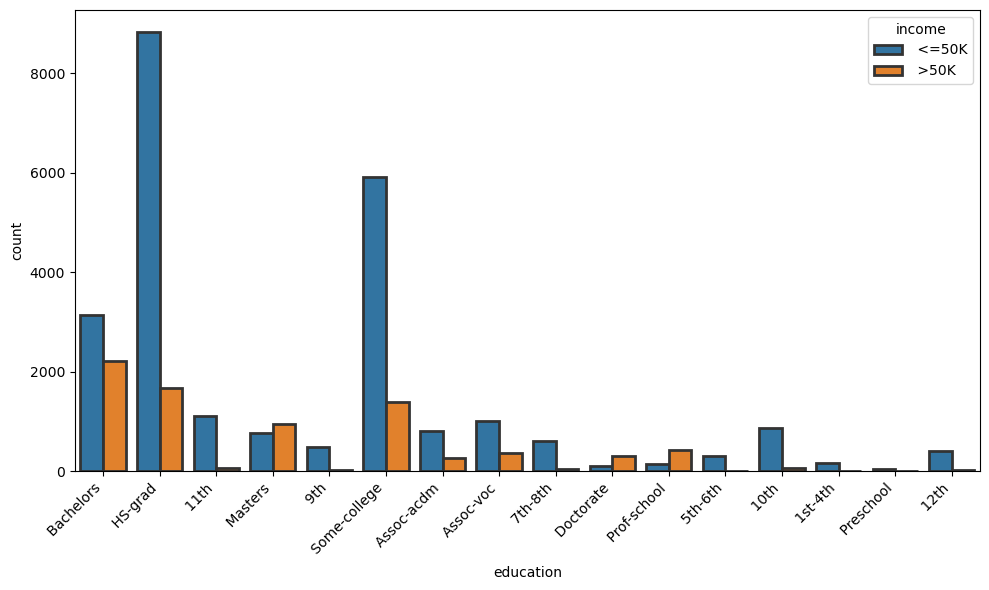

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

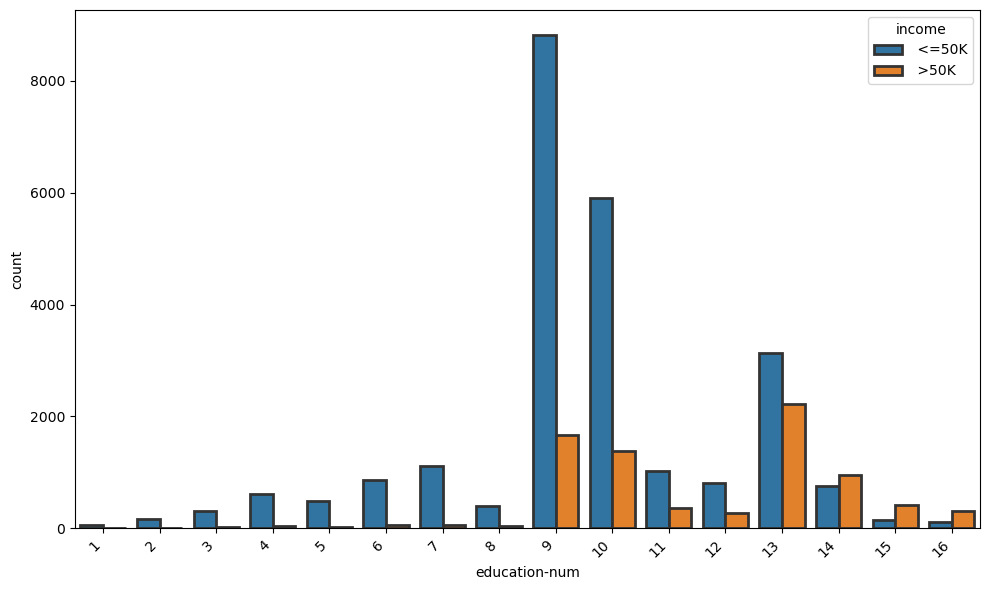

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='education-num', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Marital status

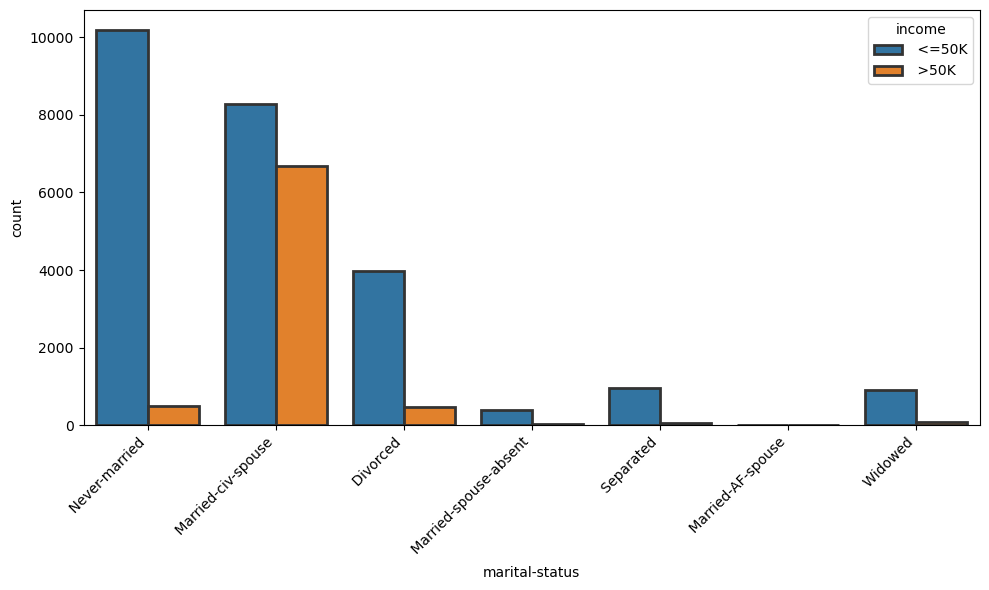

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital-status', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Occupation

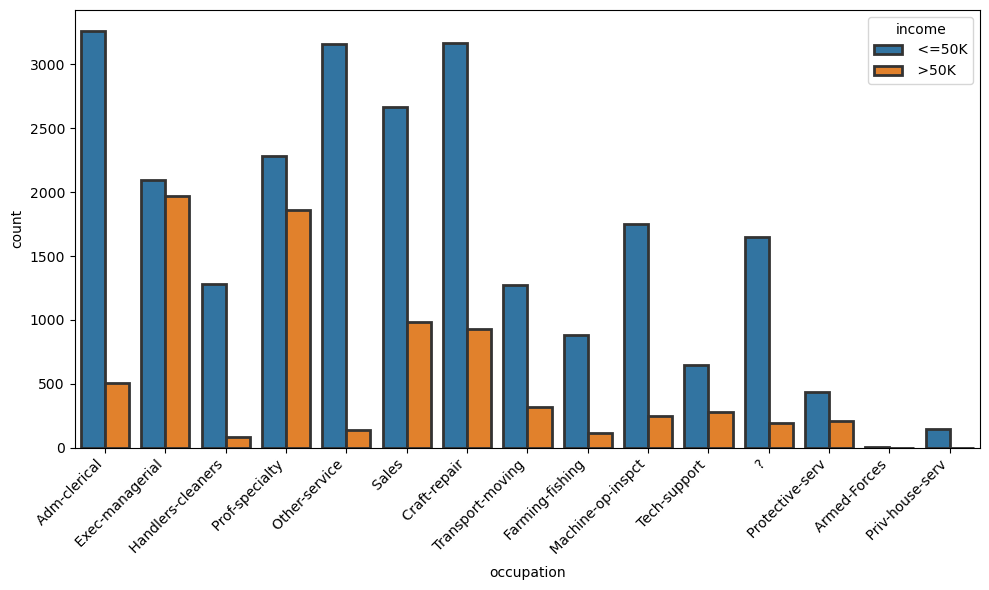

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='occupation', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Race 

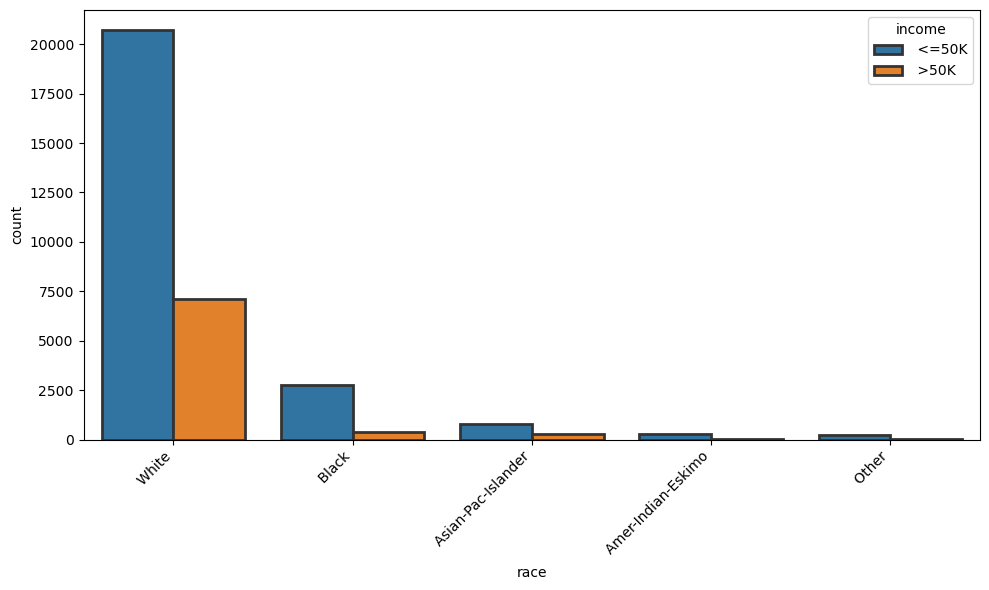

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='race', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Sex

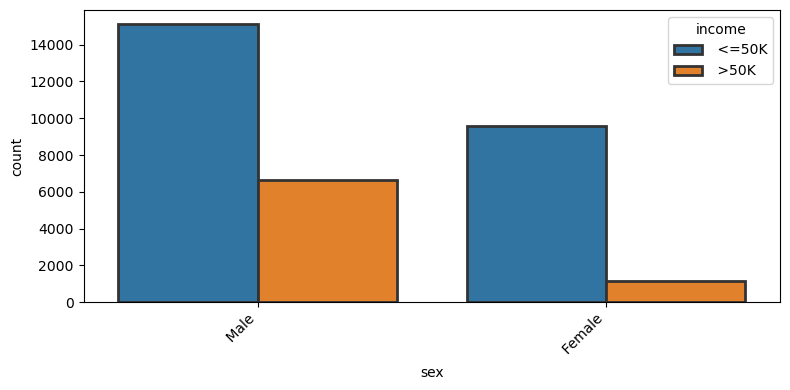

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(x='sex', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

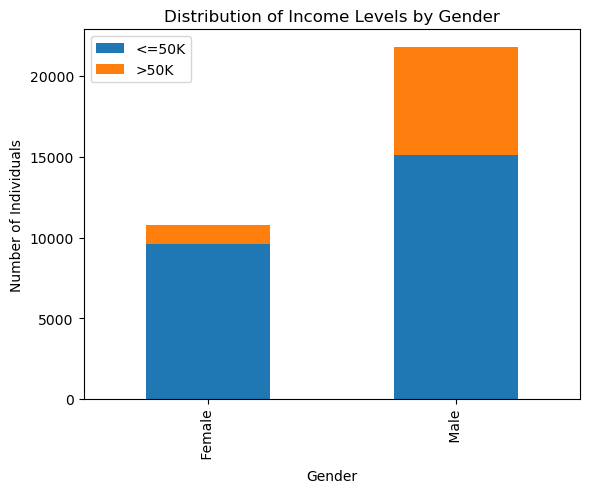

In [48]:
gender_income = df.pivot_table(index='sex', columns='income', values='fnlwgt', aggfunc='count')

#### create stacked bar chart
gender_income.plot(kind='bar', stacked=True)

#### add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Income Levels by Gender')
plt.legend(['<=50K', '>50K'])

plt.show()


## Work Hours Per Week

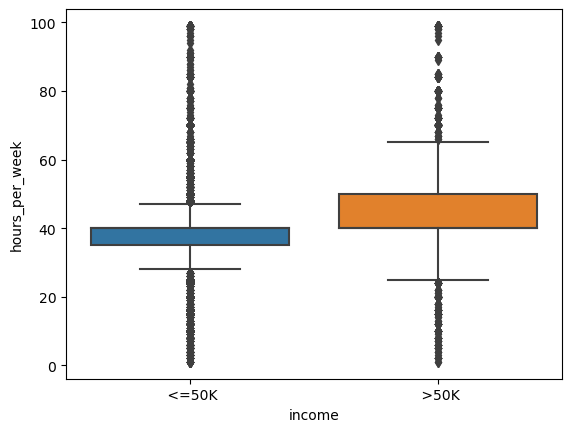

In [49]:
sns.boxplot(x="income", y="hours_per_week", data=df);

In [50]:
# Group the data by income and compute the mean, median, mode, standard deviation, and IQR of age for each group
hours_per_week_stats = df.groupby('income')['hours_per_week'].agg(['mean', 'median', lambda x: x.mode()[0], 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)]).reset_index()

# Rename the lambda columns to 'mode' and 'iqr' for clarity
hours_per_week_stats = hours_per_week_stats.rename(columns={'<lambda_0>': 'mode', '<lambda_1>': 'iqr'})

# Print the resulting dataframe
print(hours_per_week_stats)

   income       mean  median  mode        std   iqr
0   <=50K  38.840210    40.0    40  12.318995   5.0
1    >50K  45.473026    40.0    40  11.012971  10.0


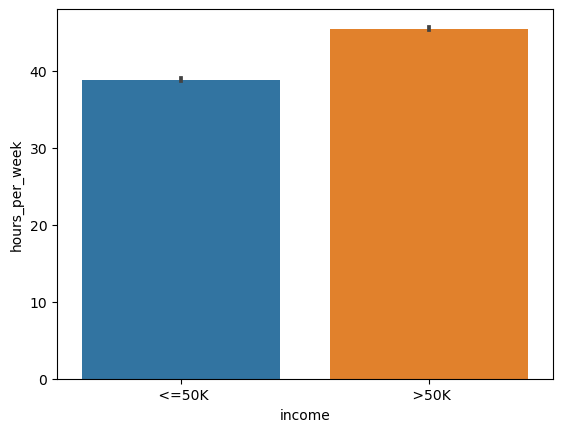

In [51]:
sns.barplot(x="income", y="hours_per_week", data=df);

<AxesSubplot: xlabel='income', ylabel='hours_per_week'>

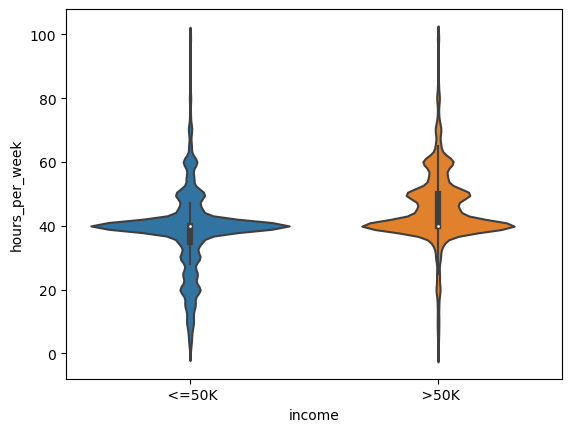

In [52]:
sns.violinplot(x="income", y="hours_per_week", data=df)

## Native country

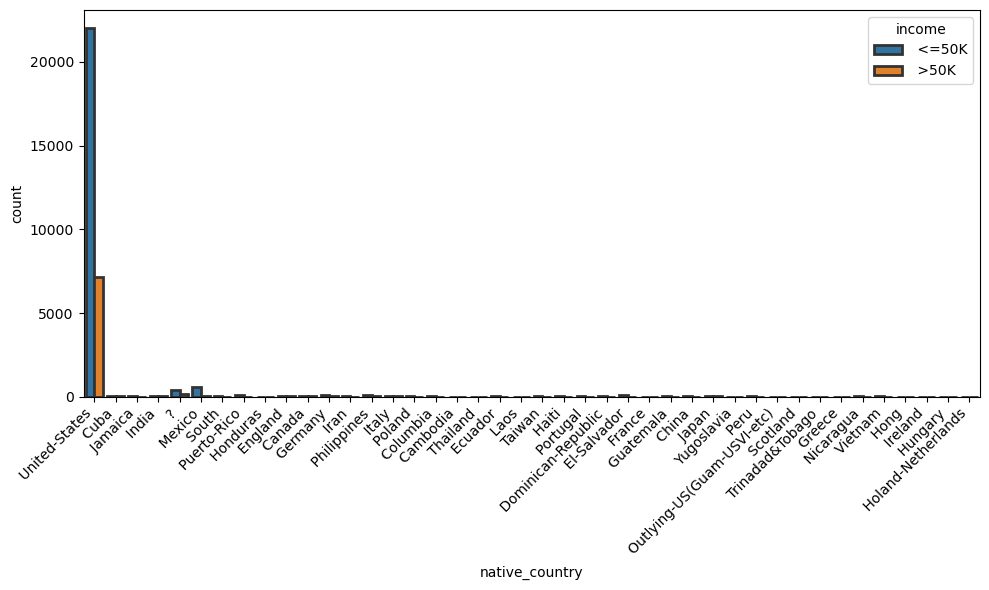

In [54]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='native_country', hue='income', data=df, linewidth=2, edgecolor=".2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add percentage labels to each bar
#total = len(df)
#for p in ax.patches:
  #  percentage = '{:.1f}%'.format(100 * p.get_height() / total)
   # x = p.get_x() + p.get_width() / 2 - 0.1
   # y = p.get_height()
   # ax.annotate(percentage, (x, y), size=12)

plt.show()